In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Retrieve and Inspect the Dataset

In [2]:
data = pd.read_excel('inclusive_features_usage.xlsx')
data.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN


In [3]:
data.dtypes

user_id                    object
feature_used               object
session_duration          float64
engagement_score            int64
accessibility_settings      int64
age_group                  object
gender                     object
additional_attributes      object
dtype: object

In [4]:
data.describe()

,session_duration,engagement_score,accessibility_settings
count,10000.000000,10000.00000,10000.000000
mean,62.443799,3.04360,2.489600
std,33.522672,1.41778,1.707332
min,5.010000,1.00000,0.000000
25%,33.070000,2.00000,1.000000
50%,63.175000,3.00000,2.000000
75%,91.600000,4.00000,4.000000
max,120.000000,5.00000,5.000000


# Data Cleaning and Preparation

## Missing Values: 

In [7]:
for x in data.columns:
    print(f'There are {data[x].isna().sum()} missing values in the column {x}.')

There are 0 missing values in the column user_id.
There are 0 missing values in the column feature_used.
There are 0 missing values in the column session_duration.
There are 0 missing values in the column engagement_score.
There are 0 missing values in the column accessibility_settings.
There are 0 missing values in the column age_group.
There are 3997 missing values in the column gender.
There are 6003 missing values in the column additional_attributes.


I decided to fill the missing values in both `gender` and `additional_attributes` with an `"Unknown"` string. Dropping rows with missing values would not be feasible, since a sizable percentage of the records in the dataset have a missing value in either column. Also, filling the missing values with a `"0"` string can be confusing (for gender, 0 could be interpreted as none of the above, or something else). Thus, `'Unknown'` provides the best context, while also allowing for easy computation of the `'Intersectionality'` column below. 

In [8]:
data['gender'] = data['gender'].fillna('Unknown').astype('object')
data['additional_attributes'] = data['additional_attributes'].fillna('Unknown').astype('object')

## Outliers

For session duration, there are no points that lie further than 1.5 times the IQR from the median. Also, there are also no points that lie outside a z-score of 2 from the mean. However, the histogram shows some variation in the frequency of each score. Still, there do not appear to be any outliers. 


In [9]:
q1 = data['session_duration'].quantile(.25)
q3 = data['session_duration'].quantile(.75)
iqr = q3 - q1
low_bound = q1 - (iqr*1.5)
up_bound = q3 + (iqr*1.5)
data[(data['session_duration']<low_bound) | (data['session_duration']>up_bound)]

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes


In [10]:
# method 2: z-score
mean = data['session_duration'].mean()
std = data['session_duration'].std()
data['z-score']=(data['session_duration']-mean)/std
data[(data['z-score']<-2) | (data['z-score']>2)]

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,z-score


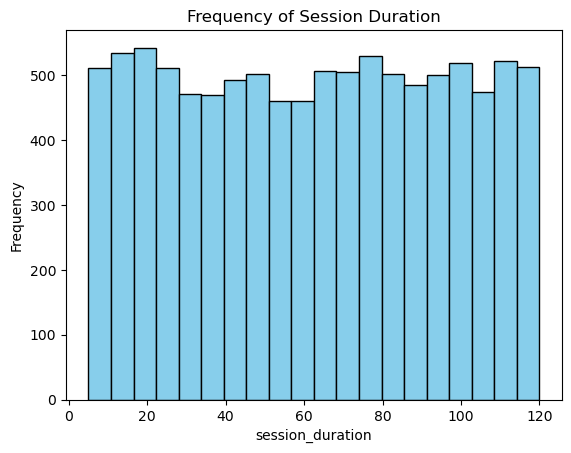

In [19]:
plt.hist(data['session_duration'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('session_duration')
plt.ylabel('Frequency')
plt.title('Frequency of Session Duration')
plt.show()

There do not appear to be outliers in engagement scores. The histogram shows that the frequency of each score is pretty even across the board. There are no points that lie further than 1.5 times the IQR from the median. There are also no points that lie outside a z-score of 2 from the mean. 

In [12]:
# method 1: IQR
q1 = data['engagement_score'].quantile(.25)
q3 = data['engagement_score'].quantile(.75)
iqr = q3 - q1
low_bound = q1 - (iqr*1.5)
up_bound = q3 + (iqr*1.5)
data[(data['engagement_score']<low_bound) | (data['engagement_score']>up_bound)]

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,z-score


In [13]:
# method 2: z-score
mean = data['engagement_score'].mean()
std = data['engagement_score'].std()
data['z-score']=(data['engagement_score']-mean)/std
data[(data['z-score']<-2) | (data['z-score']>2)]

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,z-score


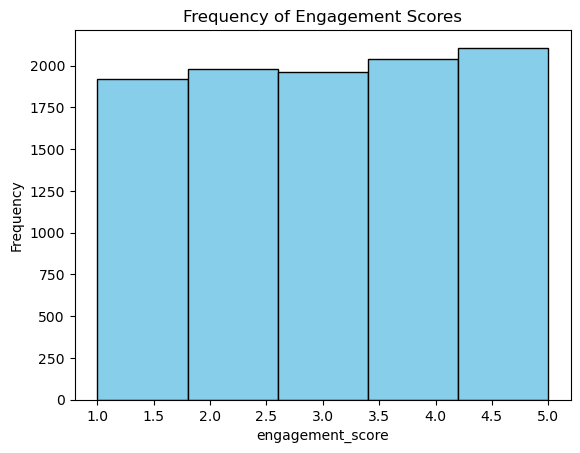

In [14]:
plt.hist(data['engagement_score'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('engagement_score')
plt.ylabel('Frequency')
plt.title('Frequency of Engagement Scores')
plt.show()

## High Accessibility User Classification: 
Explain your choice and its implications for model interpretability.

In [15]:
data['high_accessibility_user'] = [1 if x>=3 else 0 for x in data['accessibility_settings']]

In [16]:
data

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,z-score,high_accessibility_user
0,user_4737,Multilingual,60.77,4,4,Teenager,Unknown,LGBTQ+,0.674576,1
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,Unknown,1.379904,1
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,Unknown,-0.736080,0
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Unknown,LGBTQ+,-0.030752,0
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,Unknown,1.379904,0
...,...,...,...,...,...,...,...,...,...,...
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,Unknown,-1.441408,1
9996,user_3554,Visual Aid,22.44,3,2,Professional,Male,Unknown,-0.030752,0
9997,user_8892,Multilingual,12.91,4,2,Senior,Non-Binary,Unknown,0.674576,0
9998,user_8014,Multilingual,19.23,3,1,Professional,Unknown,LGBTQ+,-0.030752,0


## Intersectionality Analysis

In [17]:
data['Intersectionality']=data['age_group']+' - '+data['gender']+' - '+data['additional_attributes']

In [18]:
data

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,z-score,high_accessibility_user,Intersectionality
0,user_4737,Multilingual,60.77,4,4,Teenager,Unknown,LGBTQ+,0.674576,1,Teenager - Unknown - LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,Unknown,1.379904,1,Professional - Non-Binary - Unknown
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,Unknown,-0.736080,0,Adult - Female - Unknown
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Unknown,LGBTQ+,-0.030752,0,Adult - Unknown - LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,Unknown,1.379904,0,Young Adult - Male - Unknown
...,...,...,...,...,...,...,...,...,...,...,...
9995,user_667,Visual Aid,110.11,1,5,Adult,Non-Binary,Unknown,-1.441408,1,Adult - Non-Binary - Unknown
9996,user_3554,Visual Aid,22.44,3,2,Professional,Male,Unknown,-0.030752,0,Professional - Male - Unknown
9997,user_8892,Multilingual,12.91,4,2,Senior,Non-Binary,Unknown,0.674576,0,Senior - Non-Binary - Unknown
9998,user_8014,Multilingual,19.23,3,1,Professional,Unknown,LGBTQ+,-0.030752,0,Professional - Unknown - LGBTQ+
